In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\New folder (3)\regression_datasets_large.xlsx - Movie_Revenue.csv")
df

,Movie_ID,Marketing_Spend_Cr,Star_Power,Genre,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Competition,Box_Office_Revenue_Cr
0,1,33.106857,7,Drama,14.890417,2248,29731,5.006819,High,108.275482
1,2,27.992011,4,Comedy,73.812188,1131,44922,5.293104,High,81.992953
2,3,5.262351,8,Comedy,59.946757,944,45848,4.823532,Low,11.274974
3,4,21.014207,7,Horror,31.045263,186,4390,5.651075,Low,83.316156
4,5,19.261737,5,Drama,12.544840,2190,6997,7.783758,Low,160.426849
...,...,...,...,...,...,...,...,...,...,...
195,196,3.957252,1,Comedy,11.331944,2683,49777,7.009617,High,117.024897
196,197,13.108058,1,Comedy,54.248762,261,17994,8.462616,High,32.791202
197,198,8.817689,1,Horror,19.266055,693,2727,6.216900,Low,184.190421
198,199,43.717395,3,Horror,75.056208,2038,35622,7.035448,Low,146.924478


In [125]:
df.isnull().sum()

Movie_ID                 0
Marketing_Spend_Cr       0
Star_Power               0
Genre                    0
Budget_Cr                0
Screens                  0
Social_Media_Buzz        0
IMDB_Rating              0
Competition              0
Box_Office_Revenue_Cr    0
dtype: int64

In [126]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Marketing_Spend_Cr', ylabel='Count'>

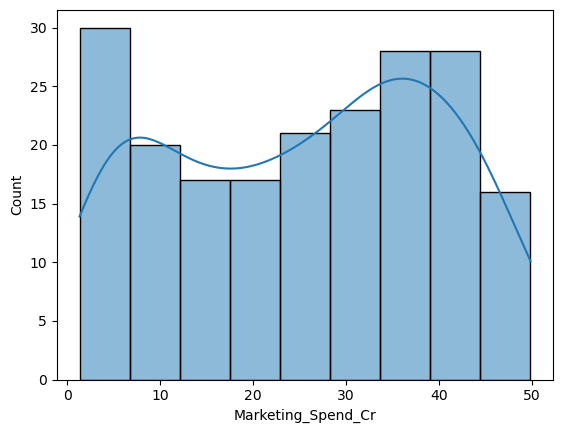

In [127]:
sns.histplot(df["Marketing_Spend_Cr"],kde=True)

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["Marketing_Spend_Cr_Normalized"] = scaler.fit_transform(df[["Marketing_Spend_Cr"]])

<Axes: xlabel='Marketing_Spend_Cr_Normalized', ylabel='Count'>

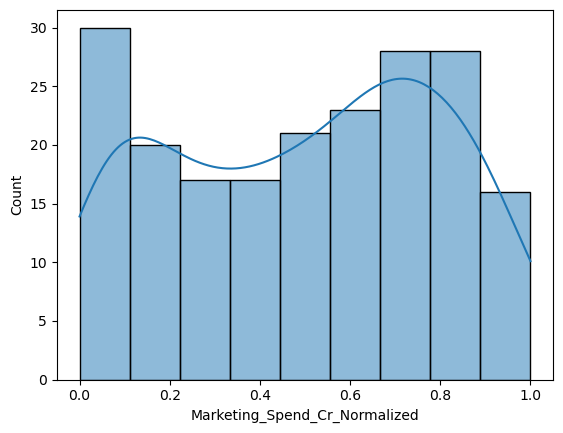

In [129]:
sns.histplot(df["Marketing_Spend_Cr_Normalized"],kde=True)

<Axes: xlabel='Box_Office_Revenue_Cr', ylabel='Count'>

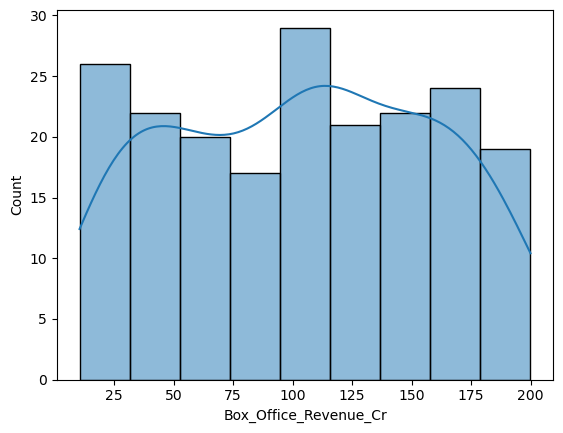

In [130]:
sns.histplot(df["Box_Office_Revenue_Cr"],kde=True)

In [131]:
Q1 = df["Marketing_Spend_Cr"].quantile(0.25)
Q3 = df["Marketing_Spend_Cr"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Marketing_Spend_Cr"] < lower_bound) | (df["Marketing_Spend_Cr"] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 0


In [132]:
Q1 = df["Box_Office_Revenue_Cr"].quantile(0.25)
Q3 = df["Box_Office_Revenue_Cr"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Box_Office_Revenue_Cr"] < lower_bound) | (df["Box_Office_Revenue_Cr"] > upper_bound)]
print("Number of outliers:", len(outliers))
df

Number of outliers: 0


,Movie_ID,Marketing_Spend_Cr,Star_Power,Genre,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Competition,Box_Office_Revenue_Cr,Marketing_Spend_Cr_Normalized
0,1,33.106857,7,Drama,14.890417,2248,29731,5.006819,High,108.275482,0.654922
1,2,27.992011,4,Comedy,73.812188,1131,44922,5.293104,High,81.992953,0.549561
2,3,5.262351,8,Comedy,59.946757,944,45848,4.823532,Low,11.274974,0.081354
3,4,21.014207,7,Horror,31.045263,186,4390,5.651075,Low,83.316156,0.405826
4,5,19.261737,5,Drama,12.544840,2190,6997,7.783758,Low,160.426849,0.369727
...,...,...,...,...,...,...,...,...,...,...,...
195,196,3.957252,1,Comedy,11.331944,2683,49777,7.009617,High,117.024897,0.054471
196,197,13.108058,1,Comedy,54.248762,261,17994,8.462616,High,32.791202,0.242968
197,198,8.817689,1,Horror,19.266055,693,2727,6.216900,Low,184.190421,0.154591
198,199,43.717395,3,Horror,75.056208,2038,35622,7.035448,Low,146.924478,0.873487


In [133]:
genre_mapping = {
    "Drama": 0,
    "Comedy": 1,
    "Horror": 2}
df["Genre"] = df["Genre"].str.strip().str.title()
df["Genre"] = df["Genre"].map(genre_mapping)
competition_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2}
df["Competition"] = df["Competition"].str.strip().str.title()
df["Competition"] = df["Competition"].map(competition_mapping)
df

,Movie_ID,Marketing_Spend_Cr,Star_Power,Genre,Budget_Cr,Screens,Social_Media_Buzz,IMDB_Rating,Competition,Box_Office_Revenue_Cr,Marketing_Spend_Cr_Normalized
0,1,33.106857,7,0.0,14.890417,2248,29731,5.006819,2,108.275482,0.654922
1,2,27.992011,4,1.0,73.812188,1131,44922,5.293104,2,81.992953,0.549561
2,3,5.262351,8,1.0,59.946757,944,45848,4.823532,0,11.274974,0.081354
3,4,21.014207,7,2.0,31.045263,186,4390,5.651075,0,83.316156,0.405826
4,5,19.261737,5,0.0,12.544840,2190,6997,7.783758,0,160.426849,0.369727
...,...,...,...,...,...,...,...,...,...,...,...
195,196,3.957252,1,1.0,11.331944,2683,49777,7.009617,2,117.024897,0.054471
196,197,13.108058,1,1.0,54.248762,261,17994,8.462616,2,32.791202,0.242968
197,198,8.817689,1,2.0,19.266055,693,2727,6.216900,0,184.190421,0.154591
198,199,43.717395,3,2.0,75.056208,2038,35622,7.035448,0,146.924478,0.873487


<Axes: >

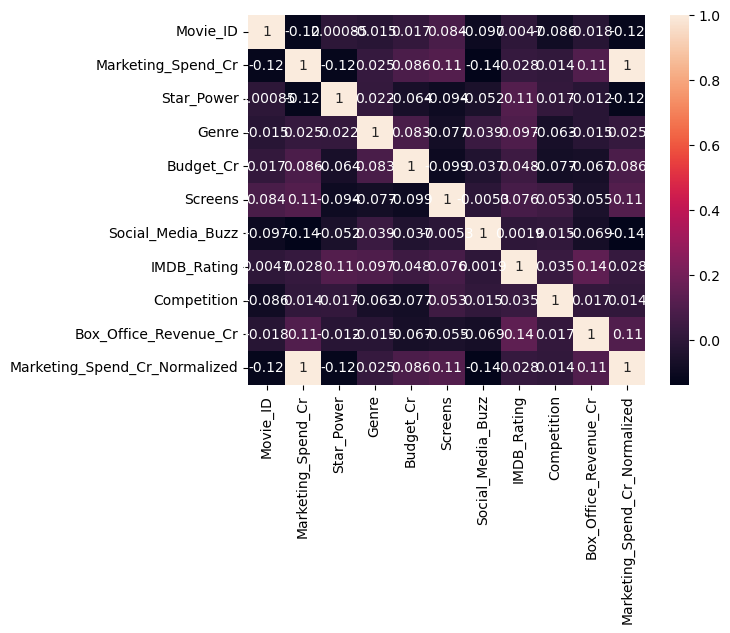

In [134]:
sns.heatmap(df.corr(),annot=True)

In [135]:
X = df[["Marketing_Spend_Cr"]]
y = df["Box_Office_Revenue_Cr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 106.14538392220001
Slope (b1): 8.60725220793997


In [136]:
predicted_revenue = model.predict([[10]])
print(predicted_revenue)

[192.217906]


In [137]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mae)
print(mse)

48.16594032854619
3124.515221539548


In [138]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: -0.06576100208407998


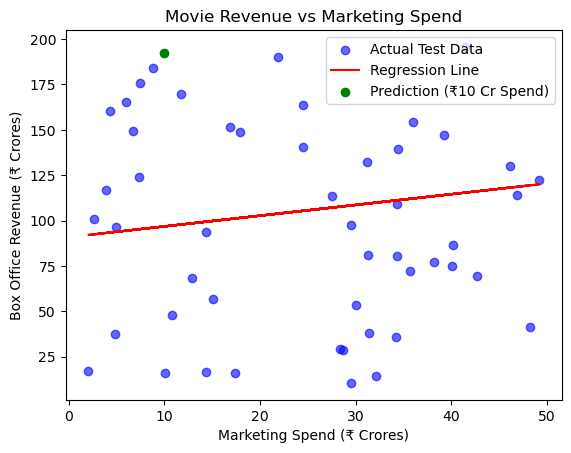

In [139]:
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Actual Test Data")
plt.plot(X_test, model.predict(X_test_scaled), color="red", label="Regression Line")
plt.scatter([10], [predicted_revenue], color="green", label="Prediction (₹10 Cr Spend)")
plt.xlabel("Marketing Spend (₹ Crores)")
plt.ylabel("Box Office Revenue (₹ Crores)")
plt.title("Movie Revenue vs Marketing Spend")
plt.legend()
plt.show()
